In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('allsides.csv')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            442 non-null    object 
 1   bias            442 non-null    object 
 2   total_votes     442 non-null    int64  
 3   agree           442 non-null    int64  
 4   disagree        442 non-null    int64  
 5   agree_ratio     442 non-null    float64
 6   agreeance_text  442 non-null    object 
 7   allsides_page   442 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 27.8+ KB


In [11]:
df['agreeance_text'].unique()

array(['Agrees', 'Strongly Agrees', 'Disagrees', 'Absolutely Agrees',
       'Neutral', 'Somewhat Agrees', 'Somewhat Disagrees',
       'Strongly Disagrees', 'Absolutely Disagrees'], dtype=object)

In [4]:
df.isnull().sum()

name              0
bias              0
total_votes       0
agree             0
disagree          0
agree_ratio       0
agreeance_text    0
allsides_page     0
dtype: int64

##BIAS DISTRIBUTION ANALYSIS

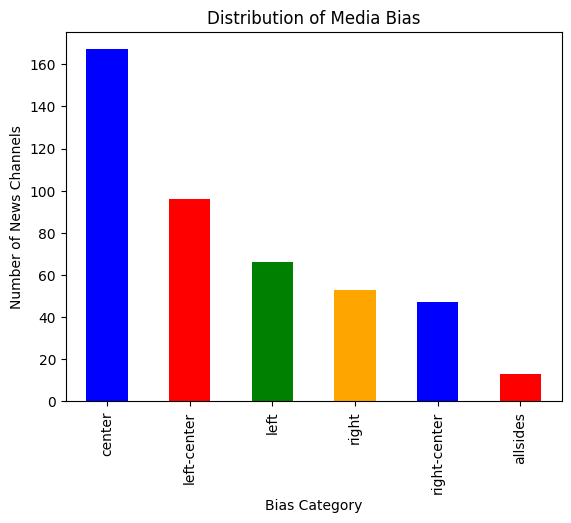

In [5]:
# Compute bias distribution
bias_distribution = df['bias'].value_counts()

# Plot the bias distribution
bias_distribution.plot(kind='bar', color=['blue', 'red', 'green', 'orange'])
plt.title('Distribution of Media Bias')
plt.xlabel('Bias Category')
plt.ylabel('Number of News Channels')
plt.show()

In [6]:
bias_distribution

center          167
left-center      96
left             66
right            53
right-center     47
allsides         13
Name: bias, dtype: int64

In [6]:
# Compare bias distribution with expected proportions (if known)
expected_distribution = {'left': 0.25, 'right': 0.25,'allsides':0.25,'center':0.25,'left-center':0.25,'right-center':0.25,
                         }
actual_distribution = bias_distribution / bias_distribution.sum()

# Check for significant deviation
deviation = abs(actual_distribution - pd.Series(expected_distribution))
print(deviation)

allsides        0.220588
center          0.127828
left            0.100679
left-center     0.032805
right           0.130090
right-center    0.143665
dtype: float64


##AGREEMENT ANALYSIS

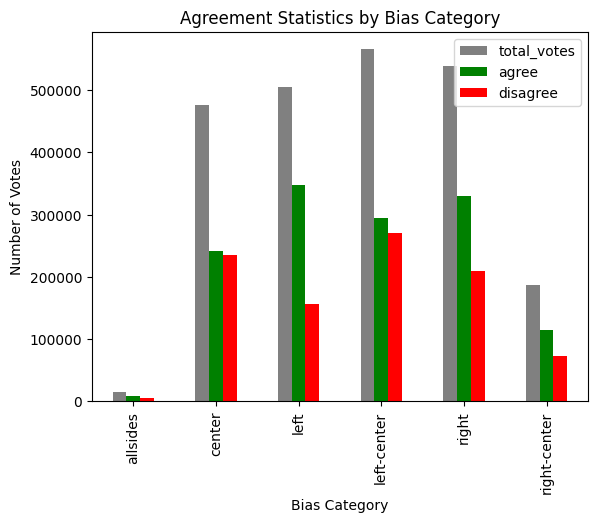

In [7]:
# Compute total votes, agrees, and disagrees for each bias category
agreement_stats = df.groupby('bias').agg({
    'total_votes': 'sum',
    'agree': 'sum',
    'disagree': 'sum'
}).reset_index()

# Plot the agreement statistics
agreement_stats.plot(kind='bar', x='bias', y=[
                     'total_votes', 'agree', 'disagree'], color=['grey', 'green', 'red'])
plt.title('Agreement Statistics by Bias Category')
plt.xlabel('Bias Category')
plt.ylabel('Number of Votes')
plt.show()

In [8]:
# Verify total votes, agrees, and disagrees with raw data
raw_totals = df.groupby('bias').agg({
    'total_votes': 'sum',
    'agree': 'sum',
    'disagree': 'sum'
})
print(raw_totals)

# Ensure totals match aggregated results
print(agreement_stats)

              total_votes   agree  disagree
bias                                       
allsides            14538    9116      5422
center             476100  241131    234970
left               505194  348132    157062
left-center        565450  294236    271214
right              538765  329523    209242
right-center       187455  114497     72958
           bias  total_votes   agree  disagree
0      allsides        14538    9116      5422
1        center       476100  241131    234970
2          left       505194  348132    157062
3   left-center       565450  294236    271214
4         right       538765  329523    209242
5  right-center       187455  114497     72958


In [9]:
# Check if agree + disagree equals total_votes
check_totals = (agreement_stats['agree'] +
                agreement_stats['disagree'] == agreement_stats['total_votes'])
print(check_totals)

0     True
1    False
2     True
3     True
4     True
5     True
dtype: bool


##AGREEMENT-RATIO ANALYSIS

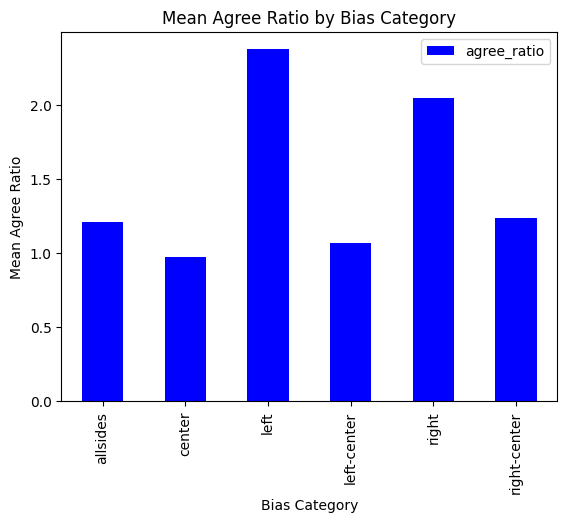

In [9]:
# Compute mean agree ratio for each bias category
agree_ratio_stats = df.groupby('bias')['agree_ratio'].mean().reset_index()

# Plot the agree ratios
agree_ratio_stats.plot(kind='bar', x='bias', y='agree_ratio', color='blue')
plt.title('Mean Agree Ratio by Bias Category')
plt.xlabel('Bias Category')
plt.ylabel('Mean Agree Ratio')
plt.show()

In [10]:
agree_ratio_stats

,bias,agree_ratio
0,allsides,1.210210
1,center,0.976078
2,left,2.371309
3,left-center,1.064900
4,right,2.043891
5,right-center,1.239174


In [11]:
# Calculate agree_ratio manually
df['calculated_agree_ratio'] = df['agree'] / (df['agree'] + df['disagree'])
manual_check = df[['agree_ratio', 'calculated_agree_ratio']].drop_duplicates()
print(manual_check)

     agree_ratio  calculated_agree_ratio
0       1.971132                0.663428
1       1.913669                0.656790
2       1.555118                0.608629
3       2.975490                0.748459
4       0.663455                0.398842
..           ...                     ...
437     2.518293                0.715771
438     1.529804                0.604712
439     0.596154                0.373494
440     1.882114                0.653032
441     1.450450                0.591912

[427 rows x 2 columns]


##SENTIMENT DISTRIBUTION ANALYSIS

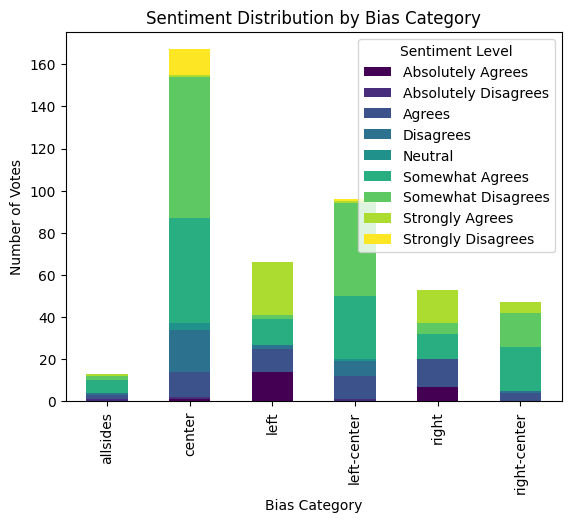

In [13]:
# Compute sentiment distribution
sentiment_distribution = df.groupby(
    ['bias', 'agreeance_text']).size().unstack(fill_value=0)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Bias Category')
plt.xlabel('Bias Category')
plt.ylabel('Number of Votes')
plt.legend(title='Sentiment Level')
plt.show()

In [14]:
sentiment_distribution

agreeance_text,Absolutely Agrees,Absolutely Disagrees,Agrees,Disagrees,Neutral,Somewhat Agrees,Somewhat Disagrees,Strongly Agrees,Strongly Disagrees
bias,,,,,,,,,
allsides,0,1,2,1,0,6,2,1,0
center,1,1,12,20,3,50,67,1,12
left,14,0,11,2,0,12,2,25,0
left-center,0,1,11,7,1,30,44,1,1
right,7,0,13,0,0,12,5,16,0
right-center,0,0,4,1,0,21,16,5,0


In [13]:
df = df.sort_values(by=['bias', 'agree_ratio', 'total_votes'], ascending=False)
agg_df = df.groupby('bias').head(3).reset_index(drop=True)
agg_df

,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page,calculated_agree_ratio
0,Babylon Bee (Humor),right-center,815,595,220,2.704545,Strongly Agrees,https://www.allsides.com/news-source/babylon-b...,0.730061
1,Washington Examiner,right-center,17996,12323,5673,2.172219,Strongly Agrees,https://www.allsides.com/news-source/washingto...,0.684763
2,The Telegraph - UK,right-center,2529,1730,799,2.165207,Strongly Agrees,https://www.allsides.com/news-source/telegraph-uk,0.684065
3,InfoWars,right,6395,5246,1149,4.565709,Absolutely Agrees,https://www.allsides.com/news-source/infowars,0.820328
4,Fox News (Opinion),right,34262,27753,6509,4.263789,Absolutely Agrees,https://www.allsides.com/news-source/fox-news-...,0.810023
5,The National Pulse,right,574,461,113,4.079646,Absolutely Agrees,https://www.allsides.com/news-source/national-...,0.803136
6,The Texas Tribune,left-center,702,482,220,2.190909,Strongly Agrees,https://www.allsides.com/news-source/texas-tri...,0.686610
7,ABC News (Online),left-center,53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...,0.663428
8,The Onion (Humor),left-center,601,395,206,1.917476,Agrees,https://www.allsides.com/news-source/onion-med...,0.657238
9,Mother Jones,left,17416,15171,2245,6.757684,Absolutely Agrees,https://www.allsides.com/news-source/mother-jo...,0.871096


In [14]:
def set_bias_value(bias):
    bias_value = 0
    if bias == 'left':
        bias_value = -2
    elif bias == 'left-center':
        bias_value = -1
    elif bias == 'left-center':
        bias_value = -1
    elif bias == 'center':
        bias_value = 0
    elif bias == 'right-center':
        bias_value = 1
    elif bias == 'right':
        bias_value = 2

    return bias_value


agg_df = agg_df.loc[agg_df.bias != 'allsides']
agg_df['bias_value'] = agg_df['bias'].map(set_bias_value)
agg_df['bias_value_final'] = agg_df['bias_value'] * agg_df['agree_ratio']
agg_df = agg_df.sort_values(by=['bias_value_final', 'agree_ratio'], ascending=[
                            True, False]).reset_index(drop=True)
agg_df

C:\Users\Sri sai teja\AppData\Local\Temp\ipykernel_7060\2482253082.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['bias_value'] = agg_df['bias'].map(set_bias_value)
C:\Users\Sri sai teja\AppData\Local\Temp\ipykernel_7060\2482253082.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['bias_value_final'] = agg_df['bias_value'] * agg_df['agree_ratio']


,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page,calculated_agree_ratio,bias_value,bias_value_final
0,Mother Jones,left,17416,15171,2245,6.757684,Absolutely Agrees,https://www.allsides.com/news-source/mother-jo...,0.871096,-2,-13.515367
1,AlterNet,left,16591,13639,2952,4.620257,Absolutely Agrees,https://www.allsides.com/news-source/alternet-...,0.822072,-2,-9.240515
2,CNN (Opinion),left,40486,33168,7318,4.532386,Absolutely Agrees,https://www.allsides.com/news-source/cnn-edito...,0.819246,-2,-9.064772
3,The Texas Tribune,left-center,702,482,220,2.190909,Strongly Agrees,https://www.allsides.com/news-source/texas-tri...,0.686610,-1,-2.190909
4,ABC News (Online),left-center,53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...,0.663428,-1,-1.971132
5,The Onion (Humor),left-center,601,395,206,1.917476,Agrees,https://www.allsides.com/news-source/onion-med...,0.657238,-1,-1.917476
6,C-SPAN,center,5467,4129,1338,3.085949,Absolutely Agrees,https://www.allsides.com/news-source/c-span,0.755259,0,0.000000
7,Newsy,center,453,315,138,2.282609,Strongly Agrees,https://www.allsides.com/news-source/newsy-med...,0.695364,0,0.000000
8,Erraticus,center,70,46,24,1.916667,Agrees,https://www.allsides.com/news-source/erraticus...,0.657143,0,0.000000
9,The Telegraph - UK,right-center,2529,1730,799,2.165207,Strongly Agrees,https://www.allsides.com/news-source/telegraph-uk,0.684065,1,2.165207


In [16]:
import seaborn as sns

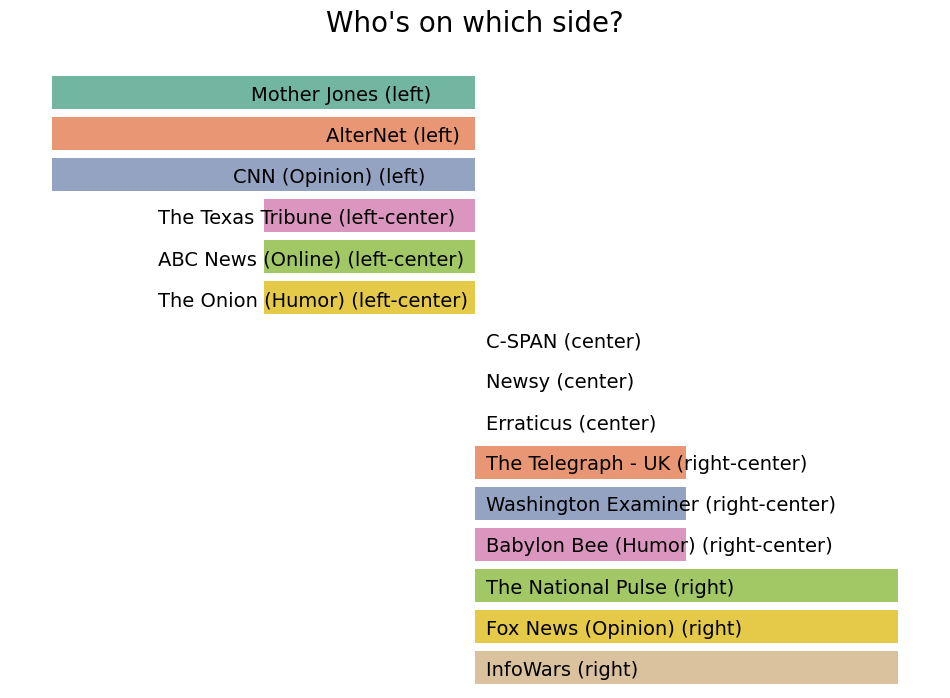

In [22]:
fig, axes = plt.subplots(figsize=(12, 8))

# Choose a color palette
palette = sns.color_palette("Set2")

sns.barplot(data=agg_df, x='bias_value', y='name', palette=palette, axes=axes)

axes.set_title("Who's on which side?\n", fontsize=20)
axes.set_xlabel('')
axes.set_ylabel('')
axes.grid(False)
axes.tick_params(which='both', left=False, bottom=False,
                labelleft=False, labelbottom=False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)


# Annotate
for row in agg_df.itertuples():
    bias_value = row.bias_value
    x_coord = 0.05 if bias_value >= 0 else -1.5/17*len(row.name)
    y_coord = row.Index
    axes.text(x_coord, y_coord, "{} ({})".format(row.name, row.bias), rotation=0,
              verticalalignment='center_baseline',
              rotation_mode='anchor',
              fontsize=14, fontweight="roman", fontstretch="extra-expanded")

plt.show()